In [52]:
%load_ext autoreload
%autoreload 2
from data import *
from visualisation2 import *
import numpy as np
# from analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


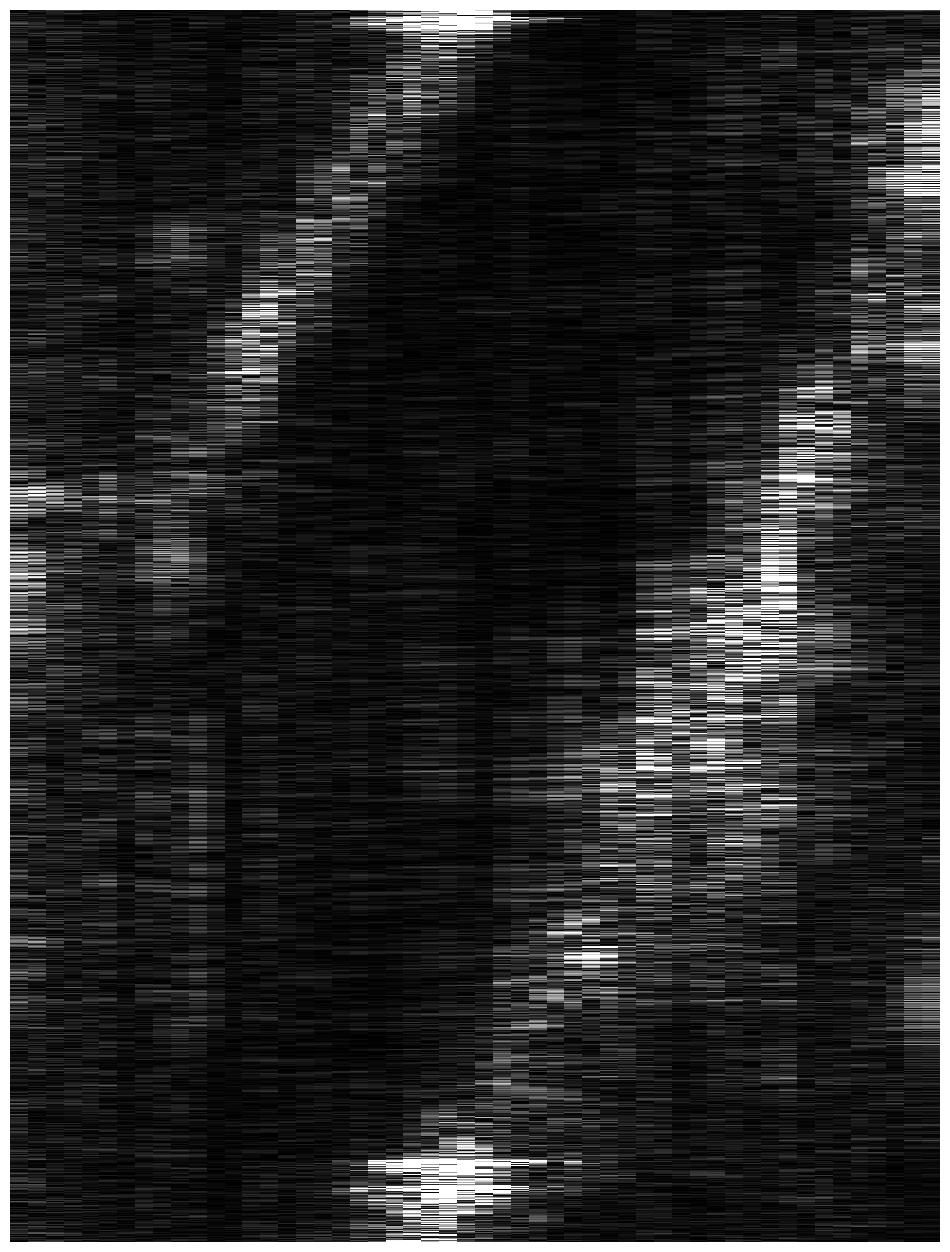

In [62]:
import numpy as np
from visualisation import plot_timeframe
import numpy as np
from data import load_from_file, prepocess

import cv2

filename = "090332.npy"

data = load_from_file(filename)
# plot_timeframe(data)

img = data.to_numpy()

img = prepocess(img)

plot_numpy(img)




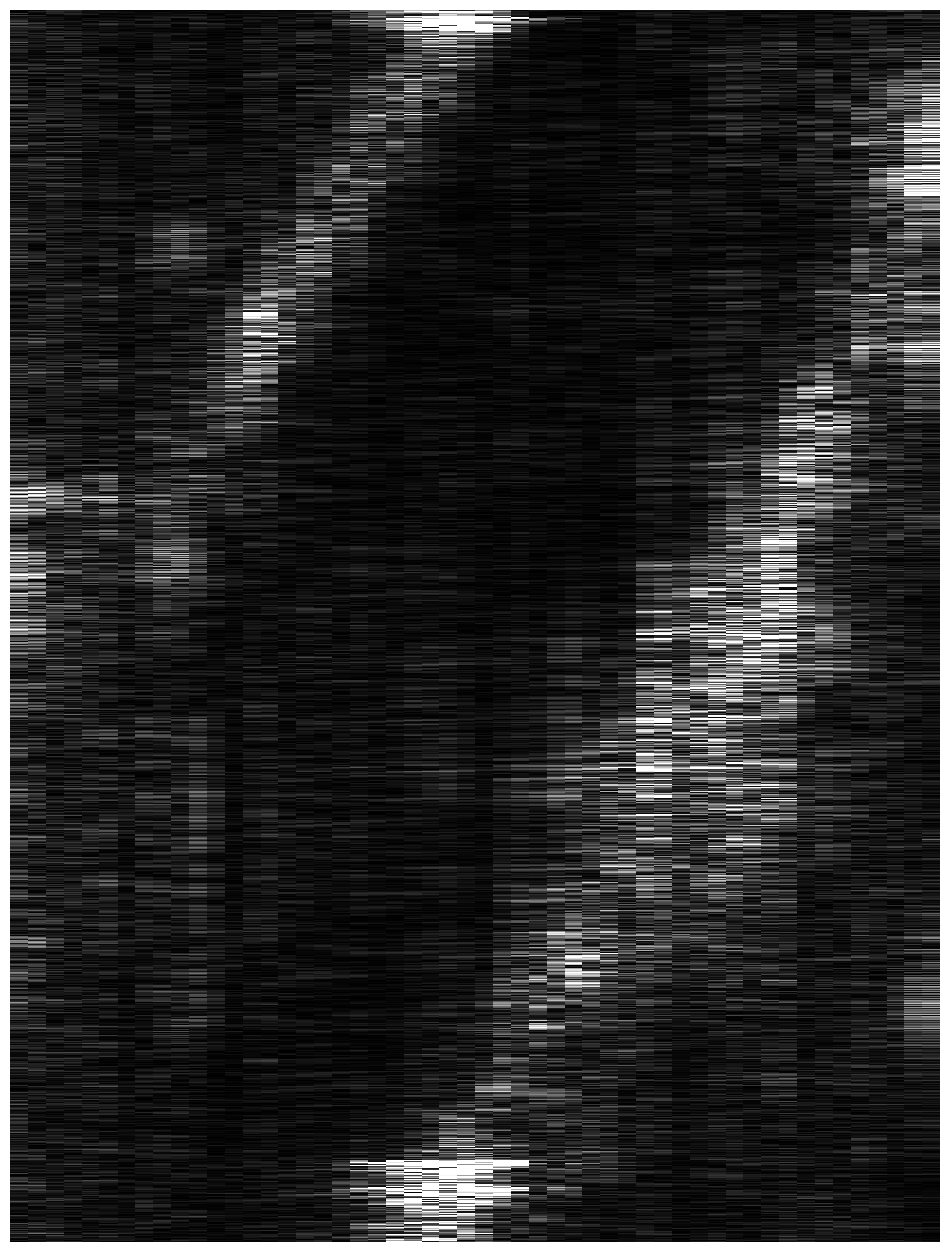

In [64]:
aspect_ratio = 12/16

h,w = img.shape

new_w = int(aspect_ratio * h)

img = cv2.resize(img, (h,new_w), interpolation=cv2.INTER_NEAREST)

plot_numpy(img)

In [55]:
# img = data.to_numpy()
# img = prepocess(img)

# img = cv2.morphologyEx(
#     img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1
# )

# plot_numpy(img)

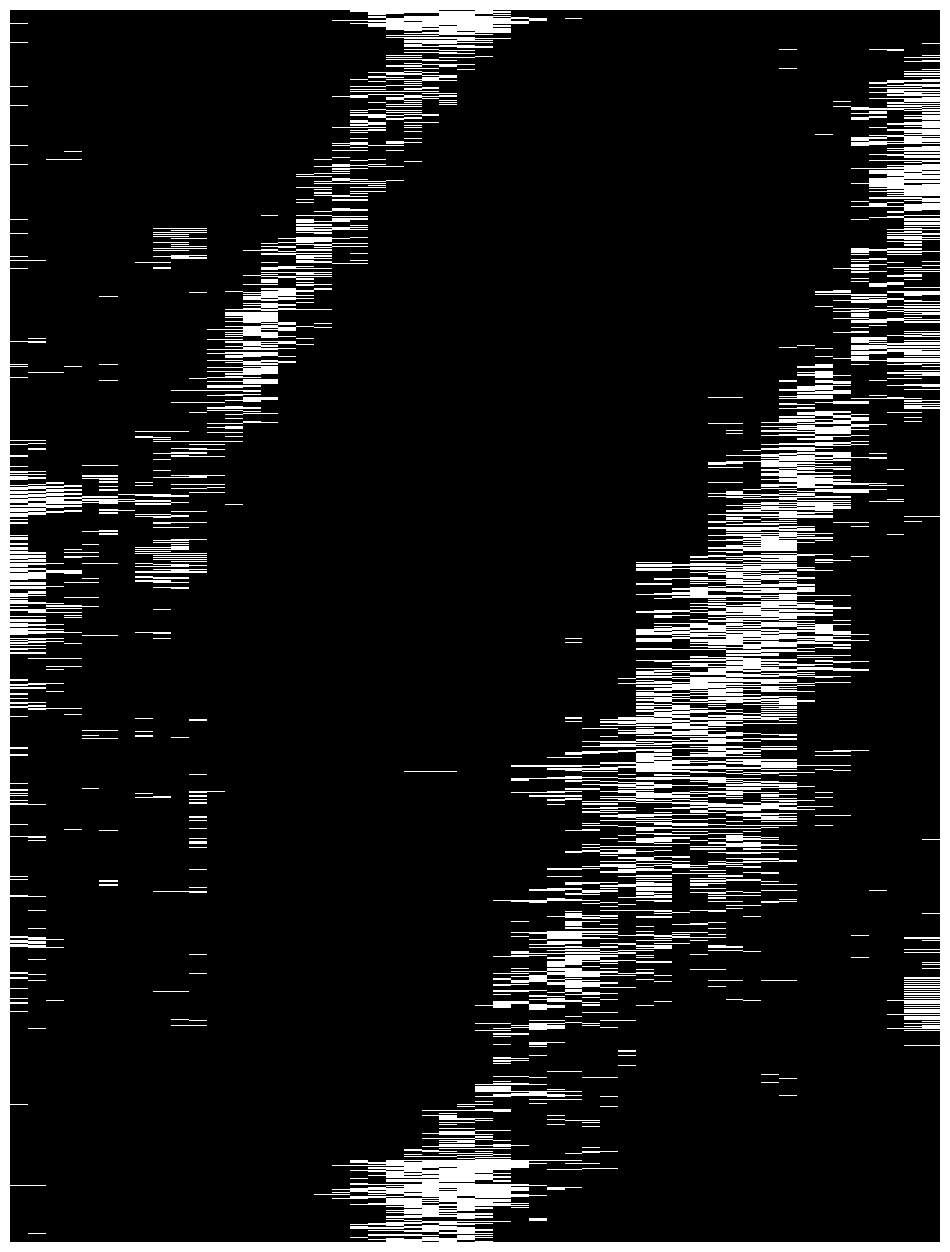

In [65]:
tr, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plot_numpy(img)

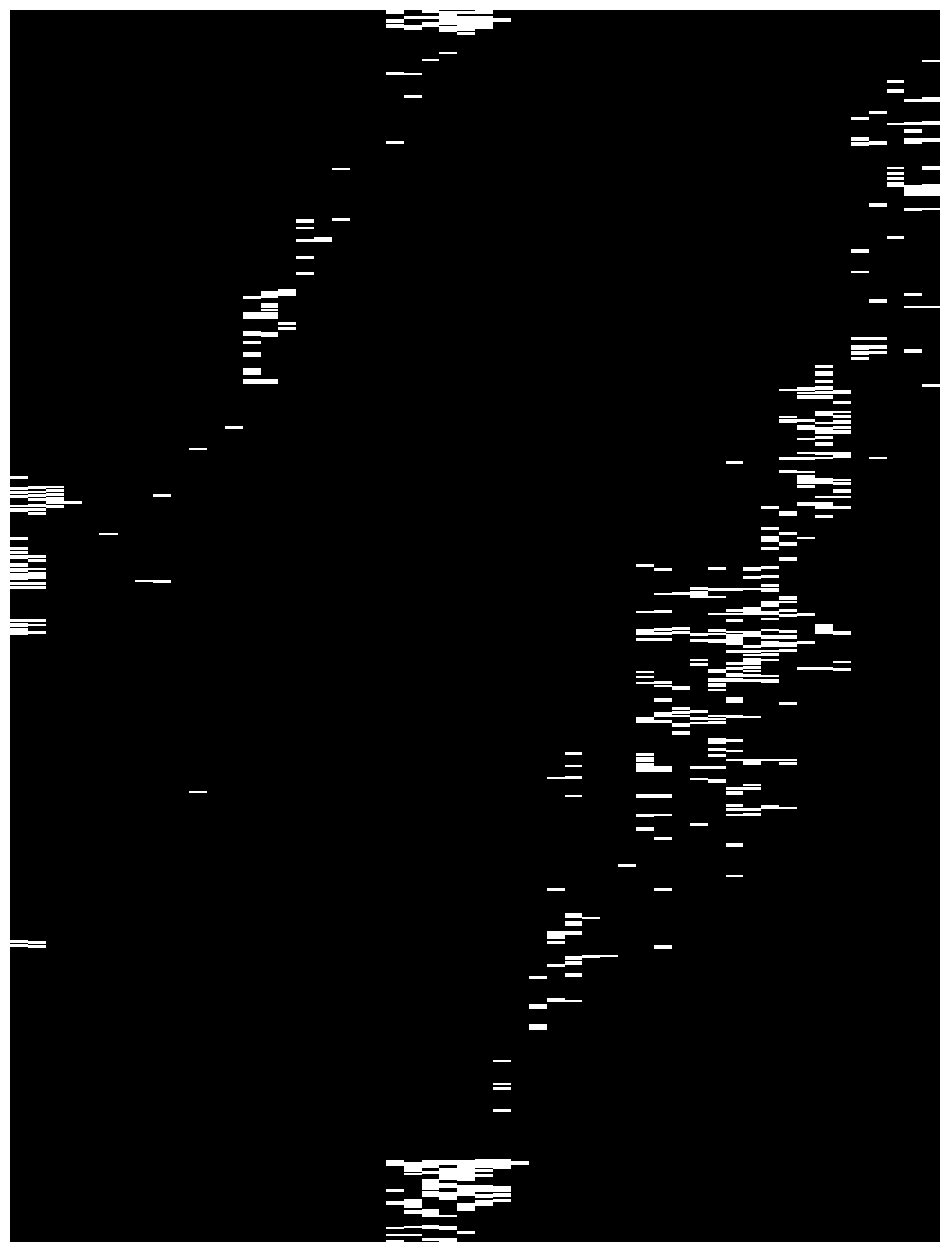

In [71]:
img = cv2.morphologyEx(
    img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)), iterations=1
)

plot_numpy(img)

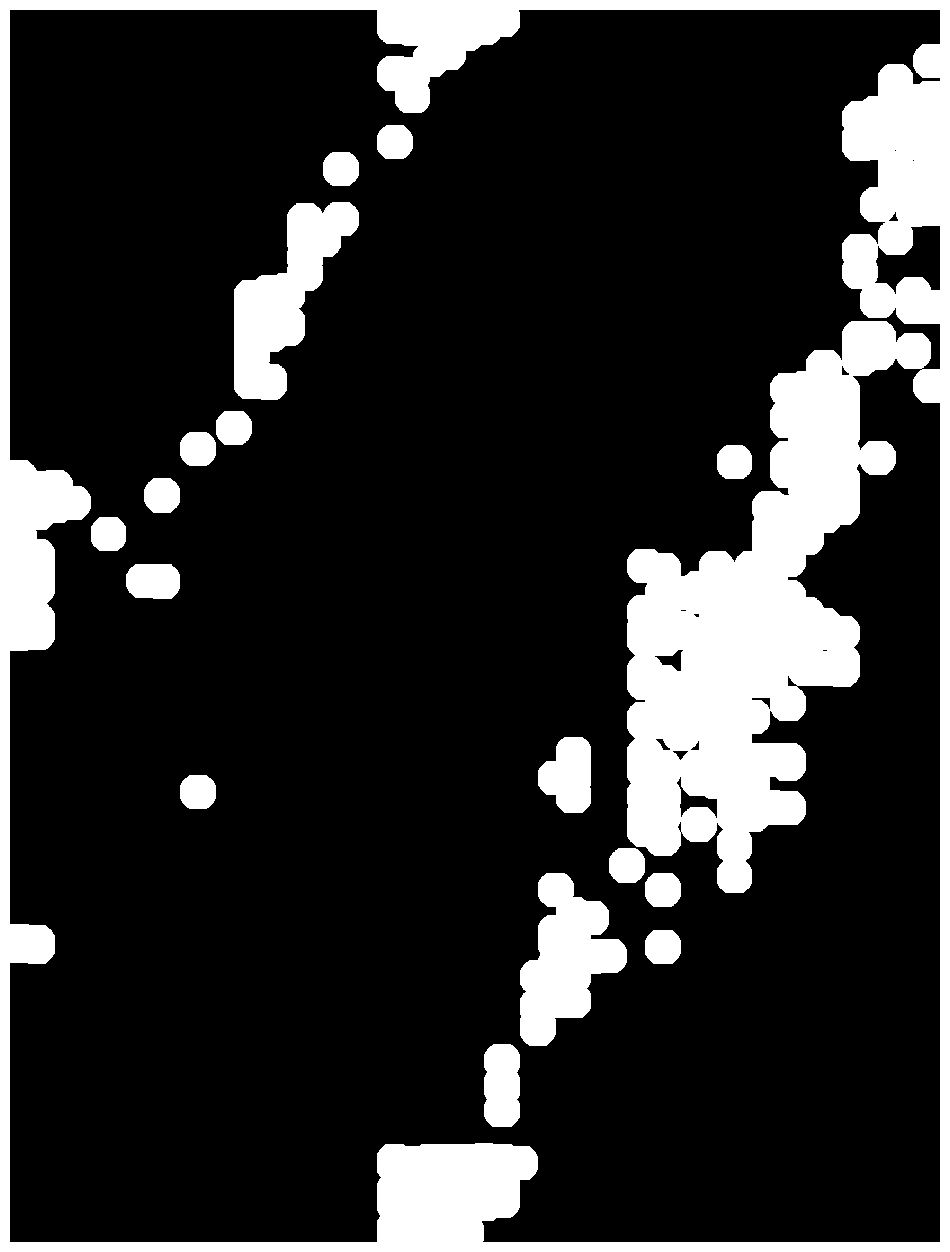

In [80]:
img = cv2.morphologyEx(
    img, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)), iterations=15
)

plot_numpy(img)

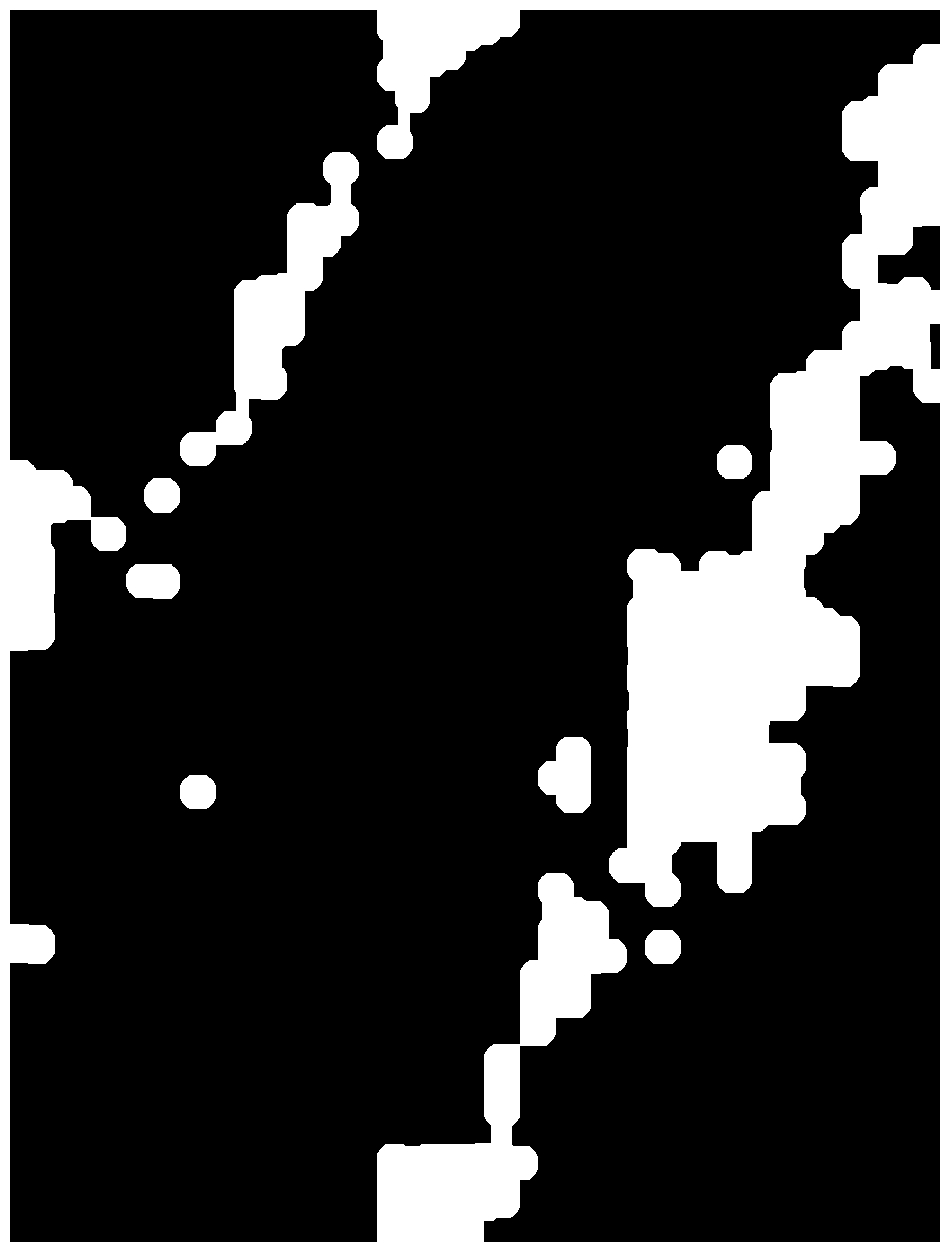

In [83]:
img2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((11,11)), iterations=5)
plot_numpy(img2)

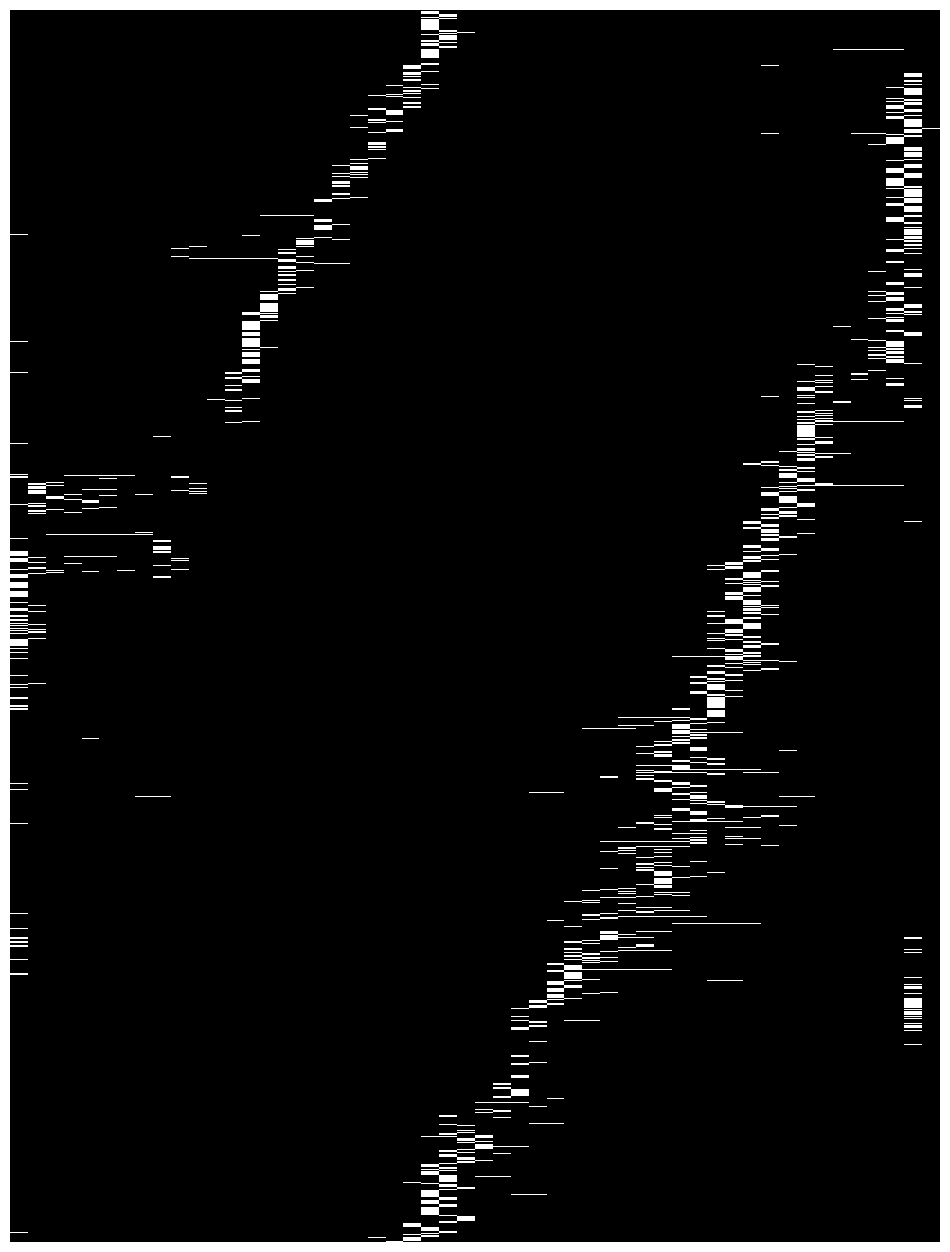

In [20]:
from skimage.morphology import skeletonize
skeleton = (255*skeletonize(img)).astype(np.uint8)

plot_numpy(skeleton)

13
gere


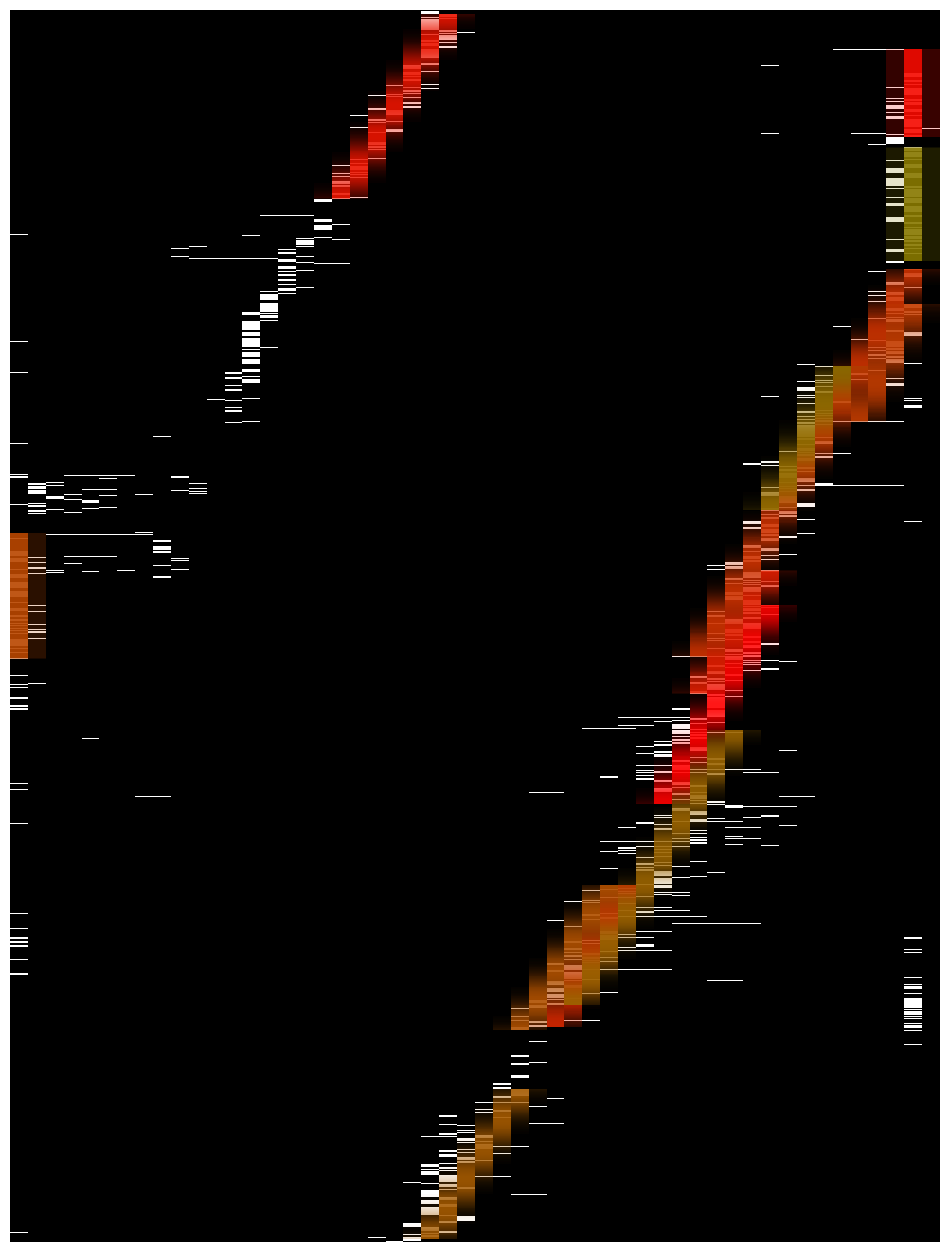

In [21]:
import math
lines = cv2.HoughLinesP(skeleton, rho=1, theta=np.pi / 500, threshold=300, minLineLength = 400, maxLineGap=50)
lines_dst = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

if lines is not None:
    print(len(lines))
    
    for i in range(0, len(lines)):
            l = lines[i][0]
            cv2.line(lines_dst, (l[0], l[1]), (l[2], l[3]), (255-i*10,i*10,0), 1, cv2.LINE_AA)

lines_dst.shape
plot_numpy(lines_dst)

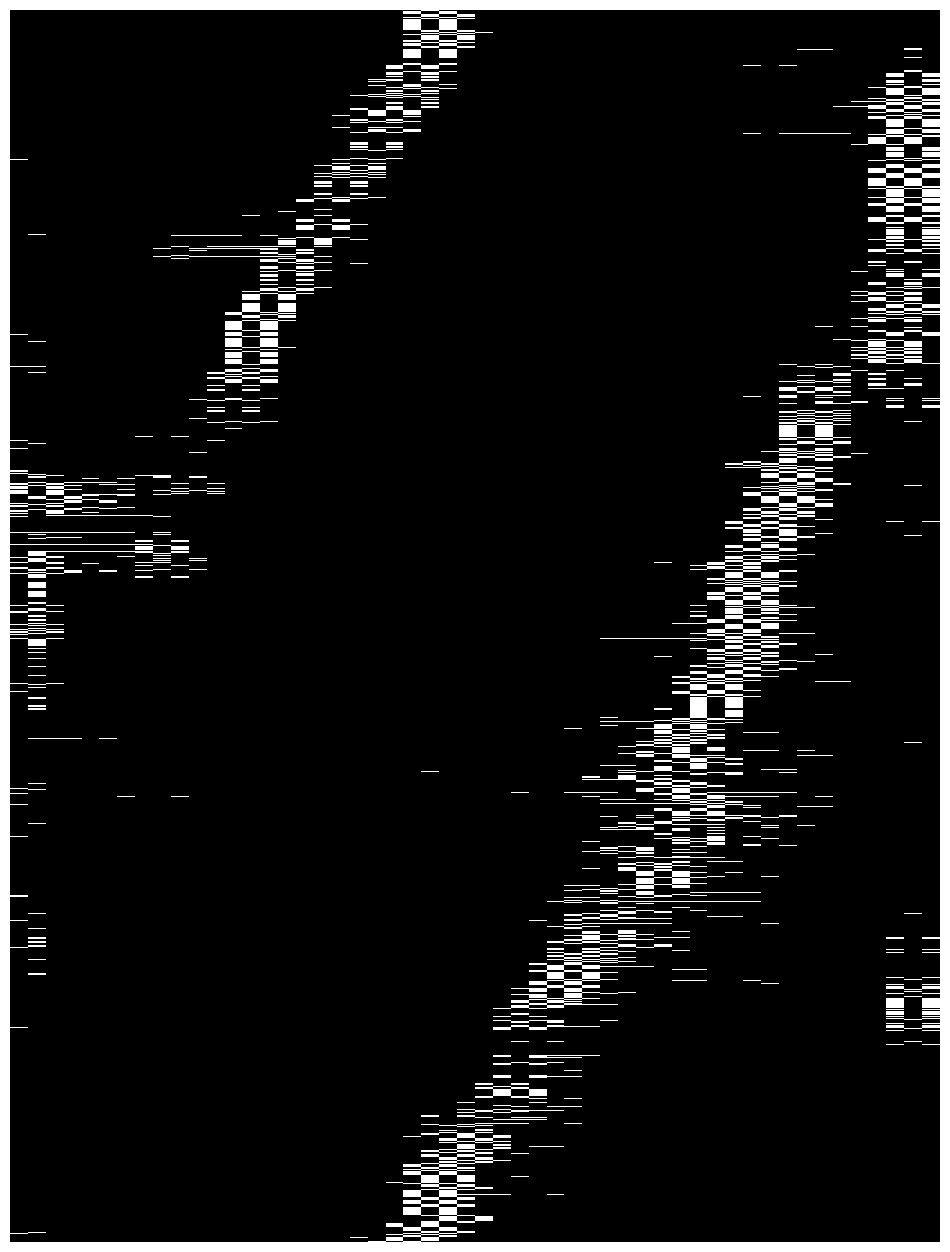

In [22]:
edges = cv2.Laplacian(skeleton.astype(np.uint8), cv2.CV_16S, 3)
plot_numpy(edges)
